# Section 5.2 Model Comparison Activities

In [1]:
import os
import pymc3 as pm
import numpy as np
import arviz as az
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
# Path Constants
if os.path.split(os.getcwd())[-1] != "notebooks":
    os.chdir(os.path.join(".."))
    
NETCDF_DIR = "inference_data"

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


## Activity: Estimating plant height ¶
Your plant loving statistician friend appreciated your work picking fertilizers so much she is now asking you to help her estimate plant growth over the course of 30 days. She fitted a linear model and a logarithmic model but wants you to use Information Criterion to help her select a model.

She also remembered how unhappy you were that raw data wasn't provided last time and has it this time.

In [2]:
df = pd.read_csv(os.path.join(NETCDF_DIR, "PlantGrowthData.csv"))
df.head()

,days,plant_height
0,13,23.837583
1,16,28.985752
2,22,32.219378
3,1,6.189307
4,4,18.364134


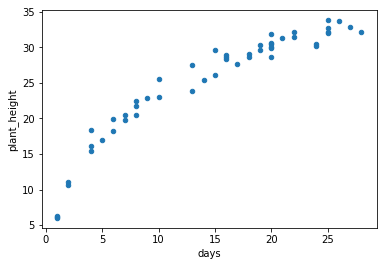

In [3]:
df.plot.scatter(x="days", y="plant_height")

### Post Tutorial fixup

In [8]:
points = 50
x = np.random.randint(1,30, points)
ϵ = stats.norm(scale=1).rvs(size=points)
y= 10*np.log(x+1)  + ϵ


In [9]:
with pm.Model() as linear_model:
    β = pm.Normal("β", mu=0, sd=1)
    α = pm.Normal("α", mu=0, sd=1)

    # Standard deviation can only be positive 
    ϵ = pm.HalfCauchy("epsilon", 1)

    y_est = pm.Normal("y_est", mu=α + β*x, sd=ϵ, observed=y)
    linear_trace = pm.sample(draws=5000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [epsilon, α, β]
Sampling 4 chains: 100%|██████████| 28000/28000 [00:06<00:00, 4568.37draws/s]


In [10]:
with pm.Model() as log_model:
    β = pm.Normal("β", mu=0, sd=1)
    α = pm.Normal("α", mu=0, sd=1)

    # Standard deviation can only be positive 
    ϵ = pm.HalfCauchy("epsilon", 1)

    y_est = pm.Normal("y_est", mu= β*np.log(x+α), sd=ϵ, observed=y)
    log_trace = pm.sample(draws=5000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [epsilon, α, β]
Sampling 4 chains: 100%|██████████| 28000/28000 [00:05<00:00, 5076.83draws/s]


### Exercise 1: Is a linear or log fit better?
Your friend has provided you some cached analysis. Normally you would have to user `az.plot_posterior` and `az.plot_trace` to verify that the MCMC run is of sufficient quality, but in this case you trust your friend's Markov Chain Monte Carlo skills so you can skip that.

Which model has a preferable information criterion?

In [11]:
comp=az.compare({"log":log_trace, "linear":linear_trace})

/home/canyon/miniconda3/envs/et/lib/python3.6/site-packages/arviz/stats/stats.py:928: UserWarning: For one or more samples the posterior variance of the log predictive
        densities exceeds 0.4. This could be indication of WAIC starting to fail see
        http://arxiv.org/abs/1507.04544 for details
        
  """


In [12]:
comp

,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
log,155.5,2.78632,0,1,10.4255,0,1,deviance
linear,307.659,1.57911,152.159,1.00243e-23,5.5751,10.8139,0,deviance


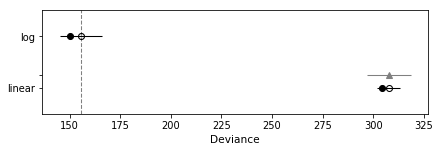

In [13]:
az.plot_compare(comp)

### Exercise 2: Is one model always the better than the other?
Your friend asks if a linear model is always better than log, or vice versa. Thinking about what you know about plant growth is it always one or the other?  

Turn to your partner and discuss. There's no right or wrong answer here.